<font size="6"><center>📊 Steam Store Most Played Games EDA 📈</center></font>

![](https://cdn.cloudflare.steamstatic.com/store/home/store_home_share.jpg)

## Introduction

Steam Store Most Played Games EDA is an analysis of the top 5000 games played on Steam, one of the largest digital game distribution platforms. This dataset provides insights into the popularity of various games, based on the number of players active on the platform. <br><br> The dataset includes four columns: Name, Current, 24th Peak, and All-time peak. The Name column contains the name of the game, while the Current, 24th Peak, and All-time peak columns provide information on the number of players currently playing the game, the highest number of players in the last 24 hours, and the highest number of players the game has ever had, respectively.<br><br> By analyzing this data, we can gain a better understanding of the current gaming trends, the most popular games on Steam, and the player behavior on the platform. This information can be used by game developers and stakeholders to make informed decisions about game development, marketing strategies, and platform management, ultimately leading to a better gaming experience for users.

In [9]:
# importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

import warnings # suppress warnings
warnings.filterwarnings("ignore") 

sns.set_style("darkgrid") # setting plot style

In [3]:
# Loading dataset
df = pd.read_csv('data.csv', usecols=lambda column: column != 'No.') #excluding the first column in the dataset 
df.head()

,Name,Current,24th Peak,All_time peak
0,Counter-Strike: Global Offensive,"785,506","1,167,926","1,320,219"
1,Dota 2,"356,601","586,637","1,295,114"
2,Apex Legends,"314,210","591,660","610,433"
3,PUBG: BATTLEGROUNDS,"240,021","452,174","3,257,248"
4,Hogwarts Legacy,"228,129","474,914","879,308"


In [4]:
df.shape

(5000, 4)

<b>Observations:</b>
- Dataset has 5000 records of diffrent games
- Our dataset contains only 4 columns

## Data Cleaning
Handling missing values, dealing with outliers, and ensuring consistency and accuracy of the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5000 non-null   object
 1   Current        5000 non-null   object
 2   24th Peak      5000 non-null   object
 3   All_time peak  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


**Observations:**
- All the features are of object type.
- We don't have any null value in any feature.

In [6]:
df.head()

,Name,Current,24th Peak,All_time peak
0,Counter-Strike: Global Offensive,"785,506","1,167,926","1,320,219"
1,Dota 2,"356,601","586,637","1,295,114"
2,Apex Legends,"314,210","591,660","610,433"
3,PUBG: BATTLEGROUNDS,"240,021","452,174","3,257,248"
4,Hogwarts Legacy,"228,129","474,914","879,308"


**Observations:**
- There isn't any problem with Name feature
- For numbers' features there are commas after every 3 number, propably for readability, because of that we have object data type.
    
**Notes:**
- We have to remove the commas in order to convert the features' data type to numeric.

### **Converting features to correct format**

In [7]:
# Removing commas and converting to numerical format
df[['Current', '24th Peak', 'All_time peak']] = df[['Current', '24th Peak', 'All_time peak']].replace(',', '', regex=True).astype(int)
df.head()

,Name,Current,24th Peak,All_time peak
0,Counter-Strike: Global Offensive,785506,1167926,1320219
1,Dota 2,356601,586637,1295114
2,Apex Legends,314210,591660,610433
3,PUBG: BATTLEGROUNDS,240021,452174,3257248
4,Hogwarts Legacy,228129,474914,879308


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5000 non-null   object
 1   Current        5000 non-null   int32 
 2   24th Peak      5000 non-null   int32 
 3   All_time peak  5000 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 97.8+ KB


We can see that the data types of the features haven been changed to appropriate ones.

### **Dealing with missing values**

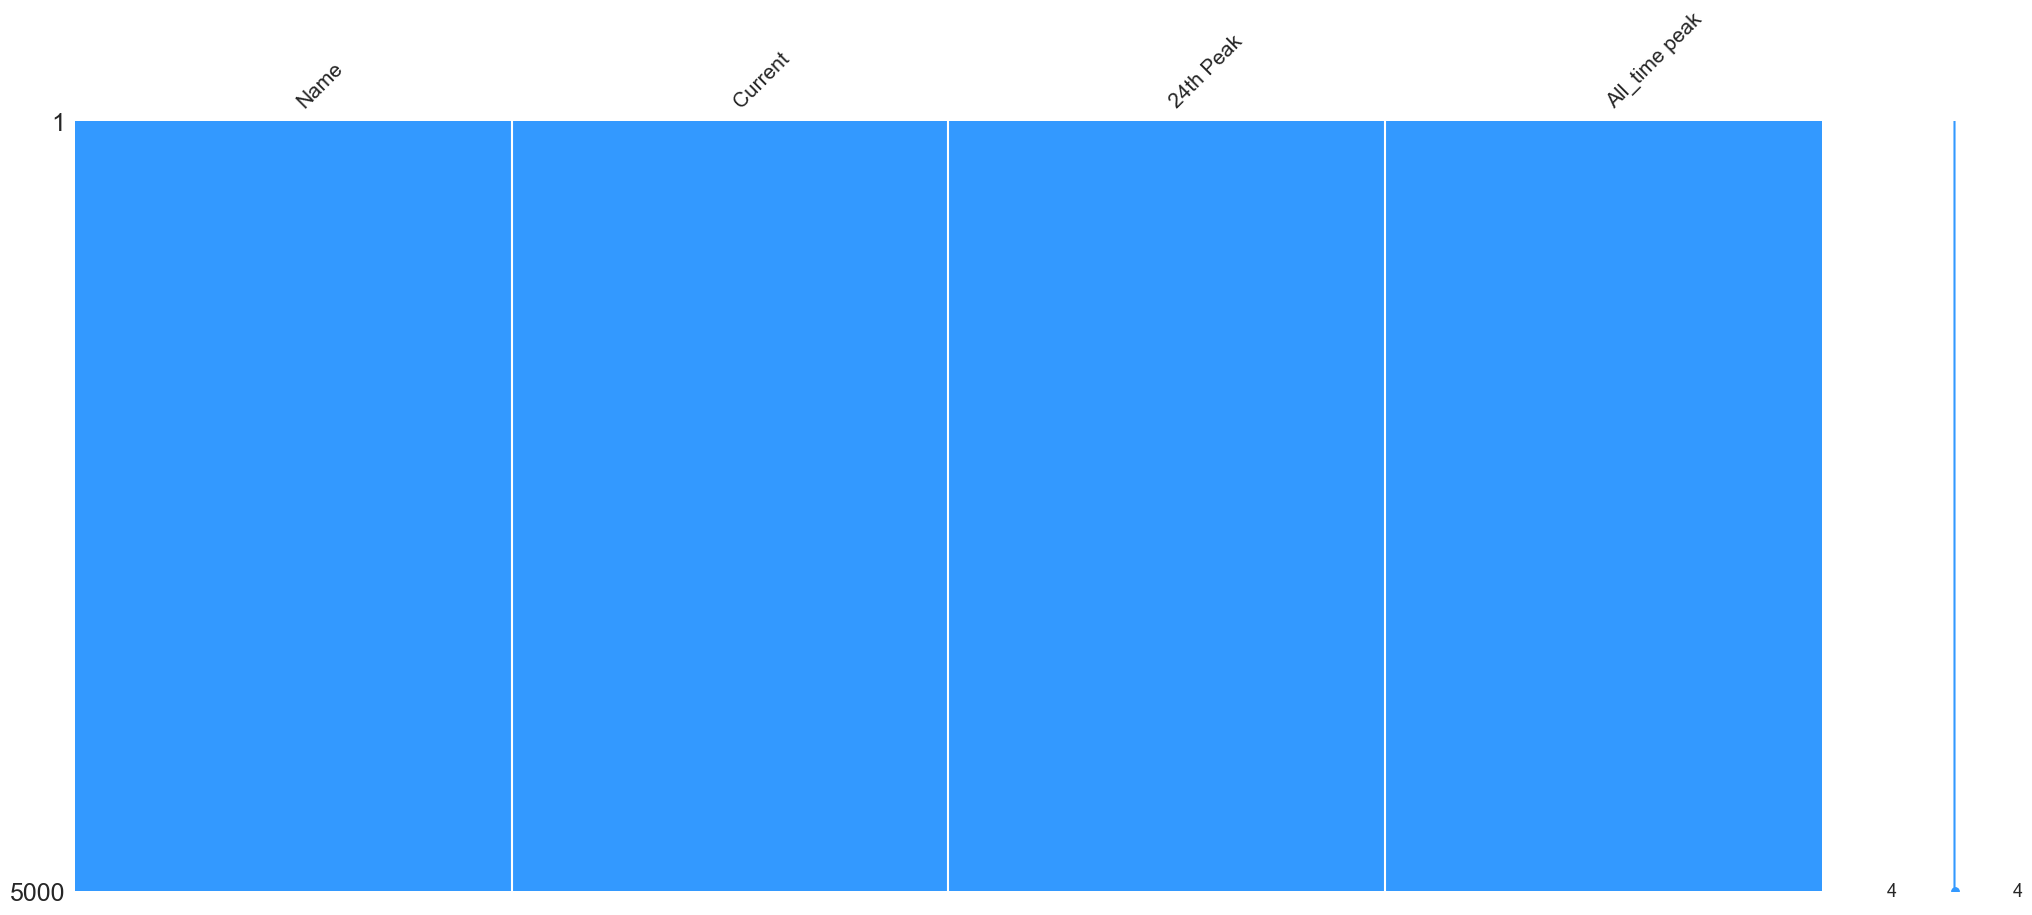

In [11]:
# Plotting number of missing values using missingno library
msno.matrix(df, color=(0.2, 0.6, 1), fontsize=15)
plt.show()

We can see that our data has no null values. Each column is complete.

### **Dealing with duplicate records**

In [12]:
# Printing duplicates
df[df.duplicated(subset='Name', keep=False)]

,Name,Current,24th Peak,All_time peak
199,Conqueror's Blade,2619,5376,19178
485,Conqueror's Blade,739,2066,15008
566,SoulWorker,572,1244,7767
3782,TERA,2,3,5068
3955,SoulWorker,1,4,11017
4272,TERA,0,2,25260


**Observations:**
- As we can see that there are 3 duplicates of games with diffrent values for other features.
- The biggest diffrence is between SoulWorker and Conqueror's Blade records.
    
**Notes:**
- From google search, we found out that for SoulWorker daily avegrage number of players is 3523<br>
    and for Conqueror's Blade is 150,000, so we are going to choose rows with higher numbers.

In [13]:
# Dropping duplicated rows
df = df.drop_duplicates(subset='Name')

# Printing records that stayed
games = ["Conqueror's Blade", "SoulWorker", "TERA"]
results = df[df["Name"].isin(games)]
print("Records that stayed in df :\n", results)

Records that stayed in df :
                    Name  Current  24th Peak  All_time peak
199   Conqueror's Blade     2619       5376          19178
566          SoulWorker      572       1244           7767
3782               TERA        2          3           5068


**Observations:**
- Simple drop_duplicates did the job as by default it considers the first value as unique value,<br> and in our data the first values are higher than the next ones.

## Univariate Analysis
Analyzing the distribution of each individual variable, such as mean, median, mode, and quartiles.

### **Analyzing distribution of numeric features**

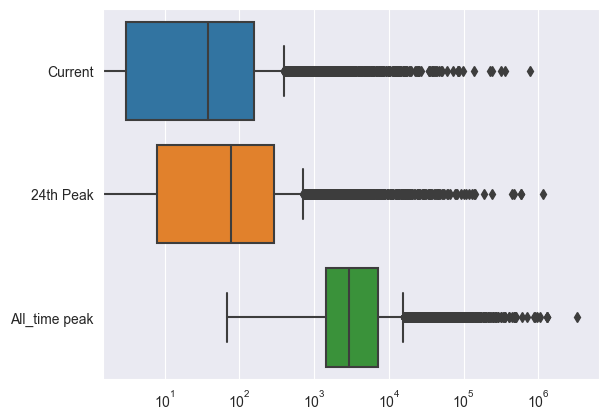

In [15]:
# Plotting boxplots for 3 features
sns.boxplot(data=df[["Current", "24th Peak", "All_time peak"]], orient="h")
plt.xscale("log")

**Observations:**
- if 24th Peak is maximal value then Current maybe median or min value
- from boxplot we can see many outliers. These outliers are games with highest number of players.

## Data Visualization
Visualizing data its patterns and trends by asking questions and answering with plots.

### <b>What are the most popular games on Steam right now?<b>

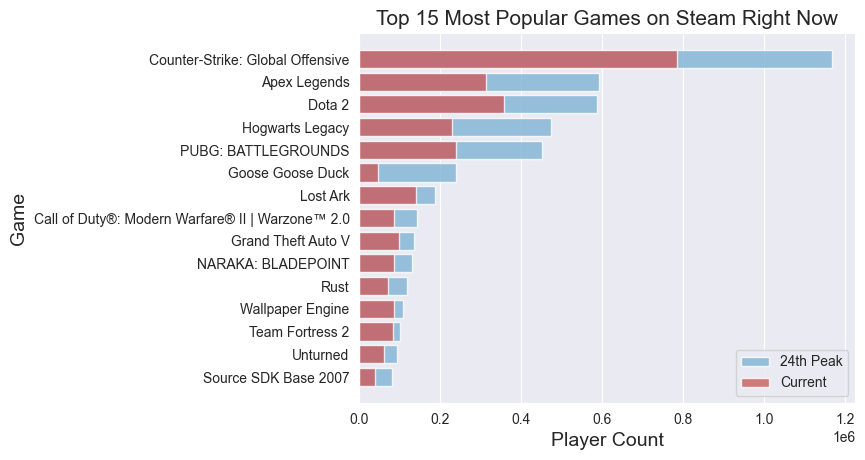

In [21]:
# Sorting dataframe by "24th Peak"
df = df.sort_values(by="24th Peak", ascending=False)

# Getting the top 15 games based on current player count
top_15 = df.head(15)

# Create a horizontal bar chart of the top 15 games in descending order
plt.barh(top_15["Name"][::-1], top_15["24th Peak"][::-1], color="#7FB3D5", label="24th Peak", alpha=0.8)
plt.barh(top_15["Name"][::-1], top_15["Current"][::-1], color="#CB5C5C", label="Current", alpha=0.8)
plt.xlabel("Player Count", fontsize=14)
plt.ylabel("Game", fontsize=14)
plt.title("Top 15 Most Popular Games on Steam Right Now", fontsize=15)
plt.legend()
plt.grid(axis="y")
plt.show()

**Observations:**
- From the plot we can see that the most popular games on steam right now are CSGO, ApexLegends, Dota2 and Hogwards Legacy.
- Hogwards Legacy is the new game, so it will propably become 2nd or even 1st most popular game on Steam in few weeks.

### <b>Which games have the highest all-time peak player counts on Steam?<b>

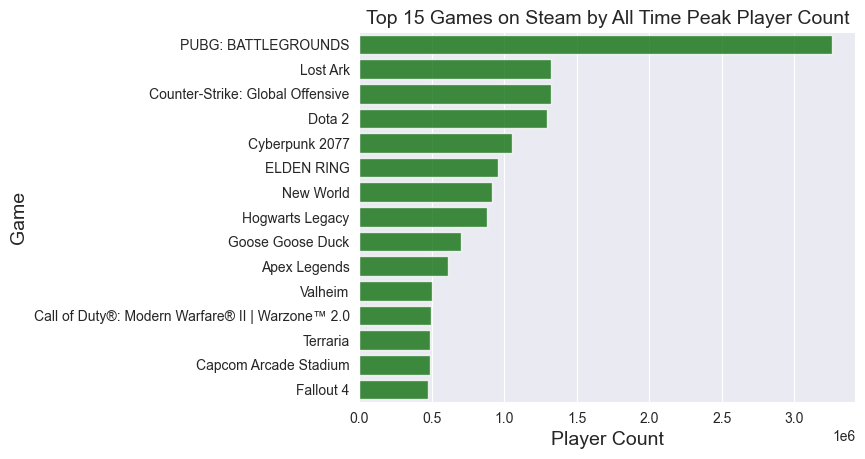

In [22]:
# Sorting dataframe by "All_time Peak"
df = df.sort_values(by="All_time peak", ascending=False)

# Getting the top 15 games based on current player count
top_15 = df.head(15)

# Creating barplot
sns.barplot(data=top_15, y="Name", x="All_time peak", color="green", alpha=0.8, label="All Time Peak")
plt.title("Top 15 Games on Steam by All Time Peak Player Count", fontsize=14)
plt.ylabel("Game", fontsize=14)
plt.xlabel("Player Count", fontsize=14)
plt.show()

**Observations:**
- From the plot we can see the highest all-time peak player count on Steam has PUBG which is over 3 million, and after that Lost Ark, CSGO and Dota2, around 1.35 million players.

### <b>Which game is the closest to its all time peak on Steam?<b>

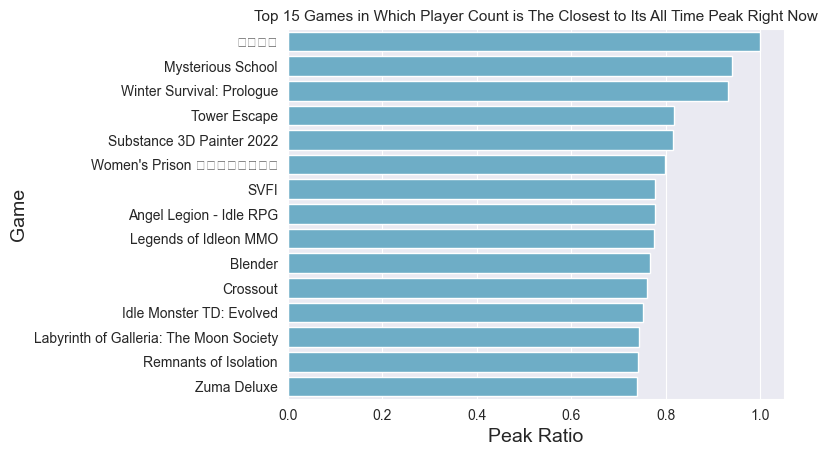

In [23]:
# Creating new feature Peak_ratio
df["Peak_ratio"] = df["Current"] / df["All_time peak"] 

# Sorting dataframe by "Peak_ratio"
df = df.sort_values(by="Peak_ratio", ascending=False)

# Getting the top 15 games based on Peak_ratio
top_15 = df.head(15)

# Creating barplot
sns.barplot(data=top_15, y="Name", x="Peak_ratio", color="#5FB3D5")
plt.title("Top 15 Games in Which Player Count is The Closest to Its All Time Peak Right Now", fontsize=11)
plt.ylabel("Game", fontsize=14)
plt.xlabel("Peak Ratio", fontsize=14)
plt.show()

**Observations:**

- Based on my reserach most of these games are quite new, which make sense why they player count is so close to their peak player count.<br> But not all of them are, which begs the question: why are they so popular right now?
- The boxes [] represents chinese characters.

In [24]:
# Printing df to show those Games with chinese characters.
top_15.head(6)

,Name,Current,24th Peak,All_time peak,Peak_ratio
1973,天下霸圖,68,68,68,1.000000
1508,Mysterious School,112,119,119,0.941176
909,Winter Survival: Prologue,272,292,292,0.931507
1272,Tower Escape,153,187,187,0.818182
670,Substance 3D Painter 2022,440,489,540,0.814815
1580,Women's Prison 絕對人權女子監獄,103,129,129,0.798450


## Conclusion

In this project, we analyzed the Steam Store's top 5000 games dataset to explore the most popular games on the platform. Through our analysis, we gained insights into the popularity of various games and their player behavior, which can be useful for game developers, stakeholders, and platform management.

We performed data cleaning and made sure that the data is consistent and accurate. The dataset had no missing values, but we found duplicate records, which we dropped after verifying the correct numbers through external sources.

In the data analysis part, we performed univariate analysis and data visualization to explore the distribution of each variable. We found that PUBG had one time above 3milion number of playing players. Counter-Strike: Global Offensive is the most played game on Steam right now and that 天下霸圖(World Domination) has same number of player count as ever peaked player count.

Our project provides an EDA on Steam Store's top games, and further analysis can be done to gain more insights into the data, such as multivariate analysis, predictive modeling, and clustering. Our analysis can be useful for game developers, publishers, and marketers who want to understand the gaming industry's trends and improve their gaming experience.
